<a href="https://colab.research.google.com/github/tare2009kopal/UCSB-SRA-bioinformatics-pipeline/blob/main/Copy_of_Kopal_Tare_Week2_RNAseq_DEG_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ------------------------------------------
# Step 1: Mount Google Drive in Colab
# ------------------------------------------
# The following code mounts your Google Drive storage to the Colab runtime.
# This is required to read and write files directly between Colab and your Google Drive.
# You only need to do this once at the start of your notebook/session.
from google.colab import drive
drive.mount('/content/drive')  # After running, follow the URL and provide Colab with access to your team Folder.

Mounted at /content/drive


In [ ]:
# ------------------------------------------
# Step 2: Change Working Directory
# ------------------------------------------
# Using the %cd "linux" command, navigate to your project folder.
# This makes file operations (save, read) default to this folder, so you don’t have to write full paths every time.
# NOTE: You must specify the correct path to your folder within Google Drive.

%cd /content/drive/MyDrive/SRA2025_Team3/


/content/drive/.shortcut-targets-by-id/1xG152BKJn3ZcpvSyQhkitPmfpH3IJ4H1/SRA2025_Team3


In [ ]:
# ------------------------------------------
# Step 3: Import pandas Library
# ------------------------------------------
# pandas is the most widely used Python library for tabular data manipulation and analysis.
# It provides the DataFrame data structure, which is similar to R's data.frame or Excel sheets.

import pandas as pd

In [ ]:
# ------------------------------------------
# Step 4: Load the Expression Dataset
# ------------------------------------------
# The dataset is stored as a compressed (gzip) tab-separated file (.tsv.gz).
# It contains gene expression values (raw counts) for thousands of genes (rows) across hundreds of samples (columns).
# Each column header contains information about the isolate/sample, which we will use later.


df = pd.read_csv(
    "/content/drive/MyDrive/SRA2025_Team3/SRA2025_Reference_dataset/GSE186719_Celegans_208strains_609samples_rawCounts.tsv.gz",
    sep="\t",          # Use tab as the column separator
    compression="gzip" # Decompress on the fly, do not manually unzip
)

In [ ]:
# RNA-seq data was downloaded from the following paper:
# Reference Paper: Zhang G, Roberto NM, Lee D, Hahnel SR, et al. The impact of species-wide gene expression variation on Caenorhabditis elegans complex traits. Nat Commun. 2022 Jun 16;13(1):3462. PMID: 35710766


# Downloaded from GEO accession number: GSE186719_Celegans_208strains_609samples_rawCounts.tsv.gz
# This file contains raw counts measured by RNA-seq for 208 strains and 609 samples.

In [ ]:

# ------------------------------------------
# Step 5: Inspect the DataFrame
# ------------------------------------------
# Print the first 5 rows using .head() to preview the data without flooding the output.
print(df.head())
# Print the shape (number of rows and columns) of the dataframe.
# Typically, each row = a gene; each column = a sample.
print(df.shape)  # Example: (65330, 610)


  transcript  AB1_GZ_B5_D6_GZpool_02_2019  AB1_GZr_B3_A3_GZpool_07_2020  \
1     MTCE.1                          0.0                           0.0   
2     MTCE.2                          0.0                           0.0   
3   MTCE.3.1                       1708.0                         558.0   
4   MTCE.4.1                        647.0                         116.0   
5     MTCE.5                          0.0                           0.0   

   AB1_GZr_B3_C9_GZpool_07_2020  BRC20067_GZ_B1_A3_GZpool_01_2019  \
1                           0.0                               0.0   
2                           0.0                               0.0   
3                         349.0                            2128.0   
4                          88.0                             759.0   
5                           0.0                               0.0   

   BRC20067_GZr_B4_B9_GZpool_07_2020  BRC20067_GZr_B1_H2_GZpool_08_2020  \
1                                0.0                       

In [ ]:
# Print the structure of a DataFrame
df
print(df.keys())

Index(['transcript', 'AB1_GZ_B5_D6_GZpool_02_2019',
       'AB1_GZr_B3_A3_GZpool_07_2020', 'AB1_GZr_B3_C9_GZpool_07_2020',
       'BRC20067_GZ_B1_A3_GZpool_01_2019', 'BRC20067_GZr_B4_B9_GZpool_07_2020',
       'BRC20067_GZr_B1_H2_GZpool_08_2020', 'BRC20263_GZ_B7_I9_GZpool_02_2019',
       'BRC20263_GZ_B7_I6_GZpool_04_2019', 'BRC20263_GZr_B7_I5_GZpool_08_2020',
       ...
       'WN2050_GZr_B6_F2_GZpool_08_2020', 'XZ1513_GZ_B8_D5_GZpool_03_2019',
       'XZ1513_GZ_B8_F6_GZpool_05_2019', 'XZ1513_GZ_B8_I5_GZpool_07_2020',
       'XZ1515_GZ_B8_I6_GZpool_03_2019', 'XZ1515_GZ_B8_I8_GZpool_05_2019',
       'XZ1515_GZ_B8_I9_GZpool_07_2020', 'XZ1516_GZ_B2_C5_GZpool_01_2019',
       'XZ1516_GZ_B2_G5_GZpool_03_2019', 'XZ1516_GZ_B5_A8_GZpool_05_2019'],
      dtype='object', length=610)


In [ ]:
desired_strains = ['CX11314', 'EG4725', 'CB4856', 'ED3017', 'JU393', 'AB1',
                   'GXW1', 'MY1', 'MY16', 'LKC34', 'DL238', 'ED3072']

available_strains = df.columns

present_strains = [strain for strain in desired_strains if any(available_strains.str.contains(strain))]
missing_strains = [strain for strain in desired_strains if not any(available_strains.str.contains(strain))]

print("✅ Found in RNA-seq data:", present_strains)
print("❌ Missing from RNA-seq data:", missing_strains)

✅ Found in RNA-seq data: ['CX11314', 'CB4856', 'ED3017', 'AB1', 'GXW1', 'MY1', 'MY16', 'LKC34', 'DL238']
❌ Missing from RNA-seq data: ['EG4725', 'JU393', 'ED3072']


In [ ]:
# ------------------------------------------
# Step 6: Some questions on the Data Structure (Discuss with your teammates)
# ------------------------------------------
# - What is each row? Each row represents a single gene. The row index or the first column may contain gene identifiers/names.
# - What is each column? Each column represents a single sample (typically, a biological or technical replicate from a particular C. elegans isolate/strain).
# - How do the columns look like? e.g. XZ1516_GZ_B5_A8_GZpool_05_2019
# - in the format of isolatename_details.

In [ ]:
# This data format is very straightforward: columns are samples and rows are genes.
# Each value is an RNA-seq raw count representing gene expression.

In [ ]:
# ------------------------------------------
# Step 7: Extract Isolate Names from Column Headers
# ------------------------------------------
# For downstream analyses, we may want to group samples by their isolate names.
# The following code replaces each column name with just the isolate name (removes the replicate/sample suffix).
# It does so by splitting on the underscore (_) and keeping only the first element.
# For example,this code is extracting XZ1516 from XZ1516_GZ_B5_A8_GZpool_05_2019

df.columns = [col.split('_')[0] for col in df.columns] #.join is a function i could change later...

In [ ]:
# Check the DataFrame again and see what has changed.

df
# Do you see that the columns have changed to the isolate names, the function above extracted the isolate names?

,transcript,AB1,AB1,AB1,BRC20067,BRC20067,BRC20067,BRC20263,BRC20263,BRC20263,...,WN2050,XZ1513,XZ1513,XZ1513,XZ1515,XZ1515,XZ1515,XZ1516,XZ1516,XZ1516
1,MTCE.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,MTCE.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,MTCE.3.1,1708.000000,558.000000,349.000000,2128.000000,948.000000,128.000000,1131.000000,983.000000,385.000000,...,265.000000,358.000000,494.000000,254.000000,143.000000,341.000000,309.000000,380.000000,311.000000,448.000000
4,MTCE.4.1,647.000000,116.000000,88.000000,759.000000,600.000000,64.000000,916.000000,271.000000,87.000000,...,83.000000,95.000000,161.000000,58.000000,92.000000,203.000000,159.000000,178.000000,105.000000,179.000000
5,MTCE.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65326,HelitronY1A_CE_RC_Helitron,9.628945,17.767164,7.017141,21.603773,31.839472,16.867366,234.582870,22.294703,15.350738,...,11.707660,18.095466,27.801743,6.316229,11.124252,16.540532,24.022285,14.108261,13.392404,17.850693
65327,HelitronY1_CE_RC_Helitron,7.482982,26.573962,15.555576,29.588903,48.695194,24.313094,218.314459,27.145548,11.808786,...,11.821531,19.848741,20.543463,32.038268,13.445609,30.220374,37.431373,36.696956,17.937137,19.630802
65328,HelitronY2_CE_RC_Helitron,1.000000,7.979308,3.000000,1.000000,3.668919,2.000000,34.085134,1.006356,2.851874,...,1.627630,2.000000,7.000000,1.015868,2.000000,1.115590,6.715876,5.146002,0.000000,1.915915
65329,HelitronY3_CE_RC_Helitron,2.000000,4.926943,3.125227,11.713186,21.876000,13.205134,100.702529,8.979996,6.307839,...,3.931377,3.424545,15.705195,3.401450,3.735376,0.419116,3.746806,3.663164,2.046539,5.662570


In [ ]:
# ------------------------------------------
# Step 8: Count Samples Per Isolate
# ------------------------------------------
# Now that the columns have been renamed to just isolate names,
# we can see how many samples (columns) we have from each isolate.
# .value_counts() gives the count of each unique isolate name (i.e., the number of replicates/samples for each strain).

print("Samples per isolate:")
print(df.columns.value_counts()) #this was edited to add .value_counts()


Samples per isolate:
AB1           3
CX11271       3
BRC20067      3
BRC20263      3
CB4852        3
             ..
NIC266        2
QX1233        2
QX1791        2
transcript    1
JU2800        1
Name: count, Length: 209, dtype: int64


In [ ]:
# Try printing the DataFrame for the strains you are interested in.
# Replace the strain names below with those you want to analyze.
# How many samples do you have?
# Feel free to explore a little bit.

# Check if the strain you are interested in is available in this RNA-seq dataset.

# For example, 'AB1', 'CX11271', 'QX1233'

interested_samples = df[['transcript', 'CX11314', 'CB4856', 'ED3017', 'AB1',
    'GXW1', 'MY1', 'MY16', 'LKC34', 'DL238', 'N2']]
print(interested_samples.columns.value_counts())


CX11314       3
CB4856        3
ED3017        3
MY16          3
AB1           3
GXW1          3
MY1           3
DL238         3
LKC34         3
N2            3
transcript    1
Name: count, dtype: int64


In [ ]:
##########################

In [ ]:
# Now we want to prepare a DataFrame for statistical testing to perform Differentially Expressed Gene (DEG) analysis!

In [ ]:
# Are you ready?

In [ ]:
# ------------------------------------------
# Step 9: Select Isolates of Interest
# ------------------------------------------
# Define a list containing the isolate names you want to keep for your analysis.
# Only samples from these isolates will be retained in the next step.
# Replace this list with any set of isolates you are interested in!
# ['GXW1', 'CB4857', 'AB1', 'CB4856', 'TR403', 'PB303', 'MY1','ED3053', 'N2', 'CB4853', 'MY16', 'MY2', 'CB4858', 'JU258', 'JU393']

isolates_to_keep = [
    'transcript', 'CX11314', 'CB4856', 'ED3017', 'AB1',
    'GXW1', 'MY1', 'MY16', 'LKC34', 'DL238', 'N2'
]


In [ ]:
# ------------------------------------------
# Step 10: Filter the DataFrame to Keep Only Selected Isolates
# ------------------------------------------
# The .isin() method checks which columns match your isolates of interest.
# .loc[:, mask] selects all rows and only those columns where the column name is in the isolates_to_keep list.
# The resulting df_filtered contains only gene expression data for your selected isolates.

df_filtered = df.loc[:, df.columns.isin(isolates_to_keep)]

In [ ]:
## how does your final dataframe look like?
df_filtered


## This dataframe will be used for your DEG analysis.

,transcript,AB1,AB1,AB1,CB4856,CB4856,CB4856,CX11314,CX11314,CX11314,...,LKC34,MY1,MY1,MY1,MY16,MY16,MY16,N2,N2,N2
1,MTCE.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,MTCE.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,MTCE.3.1,1708.000000,558.000000,349.000000,466.000000,948.000000,675.000000,85.000000,302.000000,994.000000,...,1016.000000,1177.000000,765.000000,836.000000,549.000000,227.000000,824.000000,1195.000000,547.000000,1700.000000
4,MTCE.4.1,647.000000,116.000000,88.000000,124.000000,220.000000,85.000000,46.000000,170.000000,516.000000,...,264.000000,341.000000,191.000000,193.000000,270.000000,86.000000,268.000000,295.000000,134.000000,345.000000
5,MTCE.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65326,HelitronY1A_CE_RC_Helitron,9.628945,17.767164,7.017141,10.325082,28.132491,35.152762,16.374389,20.834636,21.730958,...,9.543134,22.194190,25.858036,42.808012,37.204398,21.760736,75.393660,20.164334,20.745450,21.816435
65327,HelitronY1_CE_RC_Helitron,7.482982,26.573962,15.555576,27.318669,23.511818,30.621771,12.949976,8.734481,12.769374,...,33.295838,25.293151,26.892564,43.218720,18.213261,16.824374,26.592835,17.299264,12.663779,9.660380
65328,HelitronY2_CE_RC_Helitron,1.000000,7.979308,3.000000,4.047677,1.097624,4.000000,2.425668,4.105831,0.000000,...,5.000000,3.000000,3.000000,3.259404,1.000000,7.174786,11.000000,1.000000,2.029721,1.000000
65329,HelitronY3_CE_RC_Helitron,2.000000,4.926943,3.125227,2.444988,5.569255,19.054194,3.256883,7.265972,9.289842,...,3.102048,4.004725,8.029768,16.894323,2.544727,7.560478,5.271573,5.494772,10.401950,6.247337


In [ ]:
# DESeq2 is one of the most famous tool to detect DEGs across samples.
# Reference paper: Love, M.I., Huber, W. & Anders, S. Moderated estimation of fold change and dispersion for RNA-seq data with DESeq2. Genome Biol 15, 550 (2014). https://doi.org/10.1186/s13059-014-0550-8
# Guess how many times this paper is cited.

# DESeq2 is originally written in R
# But recently python-based DESeq2 is released.
# https://bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html

# Congratualations for the python fans.

In [ ]:
# --- Step 1: Install pyDESeq2 ---
!pip install pyDESeq2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.6/168.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.8 MB/s eta 0:00:00


In [ ]:
## Importing the packages we need

import pandas as pd
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats


In [ ]:

# 1. Set 'transcript' as index and create unique sample names for replicates.
# This is important because DESeq2 expects unique sample names.
df_deg = df_filtered.set_index('transcript')  # Set 'transcript' column as row index (each row is a gene/transcript)

# Create two lists:
# - sample_columns: will hold unique names for each column (e.g., 'GXW1_1', 'GXW1_2', etc.)
# - sample_conditions: will hold the original condition for each sample (e.g., 'GXW1', 'N2', etc.)
sample_columns = []
sample_conditions = []

# Iterate over each column in the dataframe (these are your original sample columns, may include replicates)
for col in df_deg.columns:
    count = sample_conditions.count(col)  # Count how many times this condition has already appeared
    sample_name = f"{col}_{count+1}"      # Create a unique sample name by appending the replicate number (1-based)
    sample_columns.append(sample_name)    # Store the unique sample name
    sample_conditions.append(col)         # Store the original condition name

# Rename the columns in df_deg with the unique sample names you just created
df_deg.columns = sample_columns

In [ ]:

# 2. Prepare metadata DataFrame for DESeq2
# The metadata tells DESeq2 which sample corresponds to which condition.
metadata = pd.DataFrame({
    'condition': sample_conditions  # The condition for each sample, e.g. 'GXW1' or 'N2'
}, index=sample_columns)            # Index is the unique sample names (same order as in df_deg.columns)


In [ ]:
# Important NOTE: DESeq2 performs pairwise comparisons, so you need to choose two isolates to compare.

# Repeat the pipeline below if you want to compare other pairs of isolates.

In [ ]:
# For example, I will perform DEG analysis for GXW1 and N2 because their lifespans are quite different.

In [ ]:
# 3. Subset to only keep 'GXW1' and 'N2' samples for DEG analysis.

# Make sure to replace 'GXW1' and 'N2' with the two strains you are interested in.


# - samples_to_keep: a list of unique sample names where the condition is either 'GXW1' or 'N2'
# - counts_subset: dataframe of counts for just these samples
# - metadata_subset: corresponding metadata for those samples


samples_to_keep = metadata[metadata['condition'].isin(['GXW1', 'N2'])].index
counts_subset = df_deg[samples_to_keep].round().astype(int)  # Ensure all counts are integers (required by DESeq2)
metadata_subset = metadata.loc[samples_to_keep]


In [ ]:
# Don't worry if there are functions you haven't seen before; that's completely fine.
# Our goal is just to become familiar with bioinformatics analysis.
# These functions are easy to find once you get used to them.

In [ ]:
# 4. Run DESeq2 differential expression analysis.
# - counts: transposed to shape (samples x genes), as required by PyDESeq2: Make the format for DESeq2
# - metadata: sample metadata with conditions
# - design_factors: which column of metadata to use as the experimental condition
# - refit_cooks: flag to handle outlier samples (recommended)


dds = DeseqDataSet(
    counts=counts_subset.T,       # PyDESeq2 expects samples as rows, genes as columns
    metadata=metadata_subset,     # Metadata DataFrame (samples x metadata_columns)
    design_factors="condition",   # Name of metadata column with your experimental group labels
    refit_cooks=True              # Whether to refit after outlier removal (recommended)
)


## RUNNING DEG analysis


dds.deseq2()                      # Fit the negative binomial model to your data

/tmp/ipython-input-31-2194452234.py:8: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.07 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 38.54 seconds.

Fitting dispersion trend curve...
/usr/local/lib/python3.11/dist-packages/pydeseq2/dds.py:807: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.34 seconds.

Fitting MAP dispersions...
... done in 51.15 seconds.

Fitting LFCs...
... done in 33.90 seconds.

Calculating cook's distance...
... done in 0.04 seconds.

Replacing 0 outlier genes.



In [ ]:
print(metadata['condition'].unique())

['AB1' 'CB4856' 'CX11314' 'DL238' 'ED3017' 'GXW1' 'LKC34' 'MY1' 'MY16'
 'N2']


In [ ]:
# 5. Get DEGs (Differentially Expressed Genes) for CB4856 vs N2.
# - contrast: which two conditions to compare ('CB4856' vs 'N2')
# - stat_res: object containing statistical test results


# Make sure to replace 'CB4856' and 'N2' with the two strains you are interested in.


stat_res = DeseqStats(dds, contrast=["condition", "GXW1", "N2"])
stat_res.summary()                # Optionally, print a summary table to the screen (not required for results)

degs = stat_res.results_df        # Results as a DataFrame (contains log2 fold changes, p-values, padj, etc.)

Running Wald tests...
... done in 17.54 seconds.



Log2 fold change & Wald test p-value: condition GXW1 vs N2
                               baseMean  log2FoldChange     lfcSE      stat  \
transcript                                                                    
MTCE.1                         0.000000             NaN       NaN       NaN   
MTCE.2                         0.000000             NaN       NaN       NaN   
MTCE.3.1                    1045.242166       -0.080249  0.831730 -0.096484   
MTCE.4.1                     260.731908        0.237963  0.824883  0.288481   
MTCE.5                         0.000000             NaN       NaN       NaN   
...                                 ...             ...       ...       ...   
HelitronY1A_CE_RC_Helitron    18.432684       -0.180093  0.421004 -0.427770   
HelitronY1_CE_RC_Helitron     15.340980        0.595389  0.364465  1.633597   
HelitronY2_CE_RC_Helitron      2.987004        1.905235  1.432330  1.330165   
HelitronY3_CE_RC_Helitron     10.165604        1.052865  0.480606  2.190

In [ ]:
# 6. Sort DEGs by adjusted p-value (FDR)
# - Lower padj means higher statistical significance (after multiple testing correction)

degs_sorted = degs.sort_values('padj')


# Print top5 but note that you gotta consider all of the significant DEGs.
print(degs_sorted.head())         # Print the top 5 differentially expressed genes (DEGs)


                           baseMean  log2FoldChange     lfcSE       stat  \
transcript                                                                 
MIRAGE1_DNA_CMC_Mirage  1536.290687        5.714237  0.181921  31.410520   
Y39B6A.21               2644.249232        5.443542  0.265883  20.473420   
Y48E1C.2.2               432.044609       -4.226495  0.208425 -20.278250   
Y116F11B.17.1            181.107908        4.495857  0.227916  19.725939   
F40G9.4                  204.997400        3.298375  0.168842  19.535319   

                               pvalue           padj  
transcript                                            
MIRAGE1_DNA_CMC_Mirage  1.453604e-216  4.009331e-212  
Y39B6A.21                3.716070e-93   5.124833e-89  
Y48E1C.2.2               2.001237e-91   1.839937e-87  
Y116F11B.17.1            1.291376e-86   8.904681e-83  
F40G9.4                  5.500115e-85   3.034084e-81  


In [ ]:
# This will reset the index.
# There are different transcripts for a gene, but we are interested in genes, not transcripts, at the moment.
# Extract 'gene_name' from the 'transcript' column.

degs_sorted = degs_sorted.reset_index()        ##Resetting index

degs_sorted['gene_name'] = degs_sorted['transcript'].str.split('.').str[0]

In [ ]:
# Now we have the results of the DEG analysis and statistical significance.
# This output shows how genes are differentially expressed between the two isolates of your interest, along with statistical significance (p-value).

# p-value thresholds are usually set at 0.05 or 0.01, depending on the study design and criteria.
# What is log2 fold change?
# What is fold change?

In [ ]:
# Now we need to create a good visualization to clearly present your results.

# In bioinformatics, visualization is very important for effectively communicating your findings.

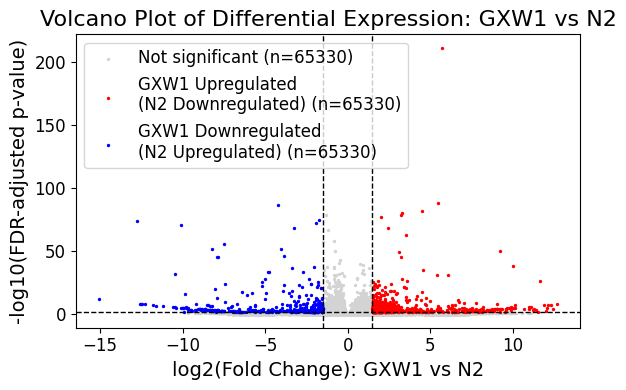

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set thresholds for fold change and adjusted p-value (FDR)
fold_change_threshold = 1.5
fdr_threshold = 0.01

# Prepare the figure
plt.figure(figsize=(6,4))  ## Set the plot size

# --- Masks for significance ---
gxw1_up = (degs_sorted['padj'] < fdr_threshold) & (degs_sorted['log2FoldChange'] > fold_change_threshold)
gxw1_down = (degs_sorted['padj'] < fdr_threshold) & (degs_sorted['log2FoldChange'] < -fold_change_threshold)
not_significant = ~(gxw1_up | gxw1_down)

# --- Count genes ---
count_not_significant = not_significant.count()
count_gxw1_up = gxw1_up.count()
count_gxw1_down = gxw1_down.count()

# --- Scatter: All genes as background (not significant) ---
plt.scatter(
    degs_sorted.loc[not_significant, 'log2FoldChange'],
    -np.log10(degs_sorted.loc[not_significant, 'padj']),
    color='lightgrey',
    alpha=1, ## Set the transparency of dots
    s=2,  ## Set the dot size you want
    label=f'Not significant (n={count_not_significant})'
)

# --- Scatter: Genes upregulated in GXW1 ---
plt.scatter(
    degs_sorted.loc[gxw1_up, 'log2FoldChange'],
    -np.log10(degs_sorted.loc[gxw1_up, 'padj']),
    color='red',  ## Feel free to change the colors
     alpha=1, ## Set the transparency of dots
    s=2,
    label=f'GXW1 Upregulated\n(N2 Downregulated) (n={count_gxw1_up})'
)

# --- Scatter: Genes downregulated in GXW1 ---
plt.scatter(
    degs_sorted.loc[gxw1_down, 'log2FoldChange'],
    -np.log10(degs_sorted.loc[gxw1_down, 'padj']),
    color='blue',
     alpha=1, ## Set the transparency of dots
    s=2,
    label=f'GXW1 Downregulated\n(N2 Upregulated) (n={count_gxw1_down})'
)




# --- Threshold lines ---
plt.axvline(fold_change_threshold, color='black', linestyle='--', linewidth=1)
plt.axvline(-fold_change_threshold, color='black', linestyle='--', linewidth=1)
plt.axhline(-np.log10(fdr_threshold), color='black', linestyle='--', linewidth=1)




# --- Axis labels and title ---

plt.xlabel('log2(Fold Change): GXW1 vs N2', fontsize=14)
plt.ylabel('-log10(FDR-adjusted p-value)', fontsize=14)
plt.title('Volcano Plot of Differential Expression: GXW1 vs N2', fontsize=16)




# --- Legend and style tweaks ---
plt.legend(fontsize=12, loc='upper left', frameon=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show() ## Command to show the plot


In [ ]:
# Set thresholds for fold change and adjusted p-value (FDR)
fold_change_threshold = 1.5
fdr_threshold = 0.01


# Print out significant DEGs with abs(log2FoldChange) >= fold_change_threshold and padj < fdr_threshold
significant_degs = degs_sorted[
    (degs_sorted["padj"] < fdr_threshold) &
    (degs_sorted["log2FoldChange"].abs() >= fold_change_threshold)
]

#PRINT

significant_degs

,transcript,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
0,MIRAGE1_DNA_CMC_Mirage,1536.290687,5.714237,0.181921,31.410520,1.453604e-216,4.009331e-212,MIRAGE1_DNA_CMC_Mirage
1,Y39B6A.21,2644.249232,5.443542,0.265883,20.473420,3.716070e-93,5.124833e-89,Y39B6A
2,Y48E1C.2.2,432.044609,-4.226495,0.208425,-20.278250,2.001237e-91,1.839937e-87,Y48E1C
3,Y116F11B.17.1,181.107908,4.495857,0.227916,19.725939,1.291376e-86,8.904681e-83,Y116F11B
4,F40G9.4,204.997400,3.298375,0.168842,19.535319,5.500115e-85,3.034084e-81,F40G9
...,...,...,...,...,...,...,...,...
4879,ZK218.20,81.903151,-2.014475,0.644240,-3.126901,1.766593e-03,9.976694e-03,ZK218
4880,ZK218.16,81.903151,-2.014475,0.644240,-3.126901,1.766593e-03,9.976694e-03,ZK218
4881,Y102A5D.11,81.903151,-2.014475,0.644240,-3.126901,1.766593e-03,9.976694e-03,Y102A5D
4882,Y102A5D.12,81.903151,-2.014475,0.644240,-3.126901,1.766593e-03,9.976694e-03,Y102A5D


In [ ]:
# You can save it to a file if you want to investigate it later.
# The file will be saved in your current working directory.

significant_degs.to_csv('DEGs_between_GXW1_and_N2.tsv', sep='\t', index=False)

## Use the saved file, to check the expression difference between two isolates and if it was significant.
## log fold change and pvalue

## What was the most differentially expressed gene between two isolates?

In [ ]:
# Check the dataframe again

significant_degs
significant_degs[significant_degs['gene_name'].str.contains('DY3.4')]

,transcript,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name


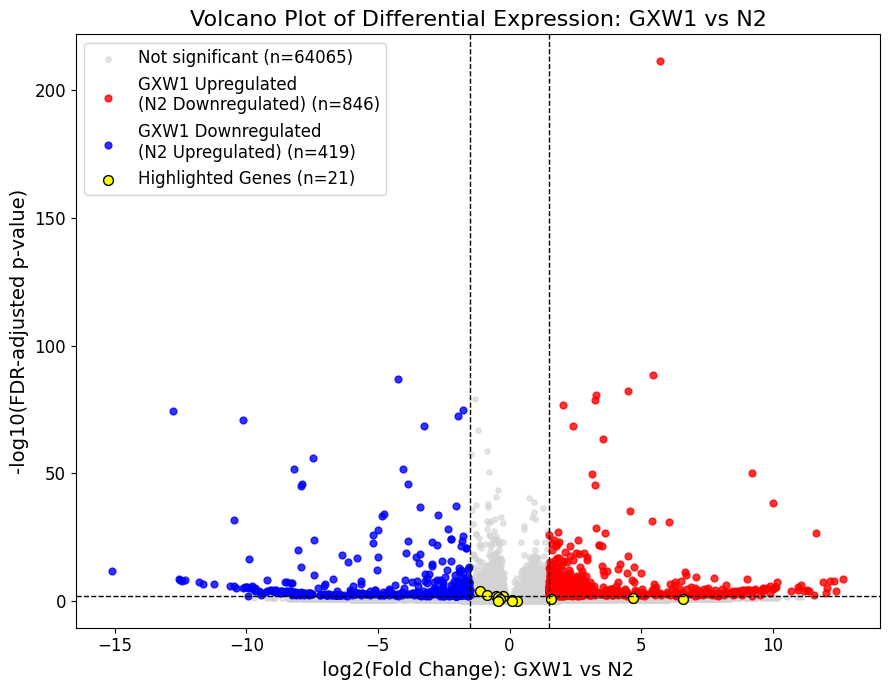

In [ ]:
# If you want to visualize genes of interest using a violin plot:

# If you see yellow dots within the significance range, it means some transcripts of those genes are significantly differentially expressed between the two isolates.

# Make sure to replace ['F40G9', 'F40G9'] with the list of genes you are interested in.


highlight_genes = 'DY3' #pot-1 # List of gene names to highlight #F57C2.3 (pot-2)


import matplotlib.pyplot as plt
import numpy as np

# Set thresholds for fold change and adjusted p-value (FDR)
fold_change_threshold = 1.5
fdr_threshold = 0.01



plt.figure(figsize=(9, 7))

# Masks for significance
gxw1_up = (degs_sorted['padj'] < fdr_threshold) & (degs_sorted['log2FoldChange'] > fold_change_threshold)
gxw1_down = (degs_sorted['padj'] < fdr_threshold) & (degs_sorted['log2FoldChange'] < -fold_change_threshold)
not_significant = ~(gxw1_up | gxw1_down)

# Mask for highlight genes
#highlight_mask = degs_sorted['gene_name'].isin(highlight_genes)
highlight_mask = degs_sorted['gene_name'].str.startswith(highlight_genes)
# Count genes
count_not_significant = not_significant.sum()
count_gxw1_up = gxw1_up.sum()
count_gxw1_down = gxw1_down.sum()
count_highlight = highlight_mask.sum()

# Plot not significant
plt.scatter(
    degs_sorted.loc[not_significant & ~highlight_mask, 'log2FoldChange'],
    -np.log10(degs_sorted.loc[not_significant & ~highlight_mask, 'padj']),
    color='lightgrey', alpha=0.6, s=14,
    label=f'Not significant (n={count_not_significant})'
)

# Plot upregulated
plt.scatter(
    degs_sorted.loc[gxw1_up & ~highlight_mask, 'log2FoldChange'],
    -np.log10(degs_sorted.loc[gxw1_up & ~highlight_mask, 'padj']),
    color='red', alpha=0.8, s=24,
    label=f'GXW1 Upregulated\n(N2 Downregulated) (n={count_gxw1_up})'
)

# Plot downregulated
plt.scatter(
    degs_sorted.loc[gxw1_down & ~highlight_mask, 'log2FoldChange'],
    -np.log10(degs_sorted.loc[gxw1_down & ~highlight_mask, 'padj']),
    color='blue', alpha=0.8, s=24,
    label=f'GXW1 Downregulated\n(N2 Upregulated) (n={count_gxw1_down})'
)

# Plot highlighted genes (always on top)
plt.scatter(
    degs_sorted.loc[highlight_mask, 'log2FoldChange'],
    -np.log10(degs_sorted.loc[highlight_mask, 'padj']),
    color='yellow', edgecolor='black', alpha=1.0, s=50,
    label=f'Highlighted Genes (n={count_highlight})'
)

# Threshold lines
plt.axvline(fold_change_threshold, color='black', linestyle='--', linewidth=1)
plt.axvline(-fold_change_threshold, color='black', linestyle='--', linewidth=1)
plt.axhline(-np.log10(fdr_threshold), color='black', linestyle='--', linewidth=1)

# Labels and title
plt.xlabel('log2(Fold Change): GXW1 vs N2', fontsize=14)
plt.ylabel('-log10(FDR-adjusted p-value)', fontsize=14)
plt.title('Volcano Plot of Differential Expression: GXW1 vs N2', fontsize=16)

plt.legend(fontsize=12, loc='upper left', frameon=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


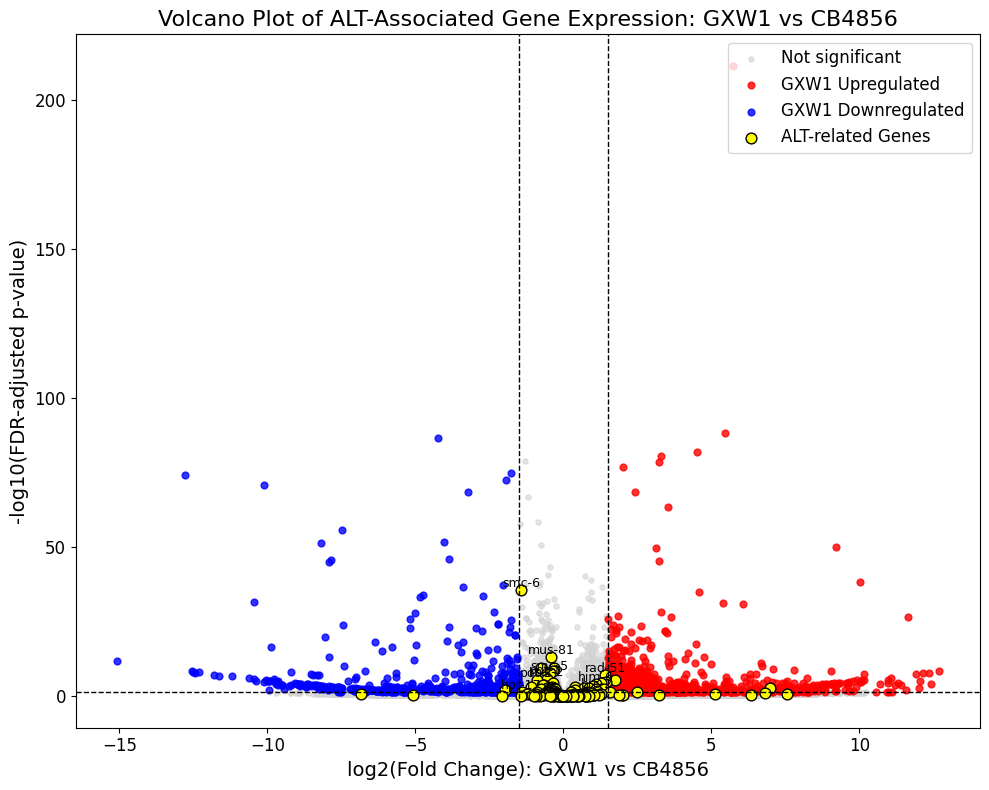

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set thresholds
fold_change_threshold = 1.5
fdr_threshold = 0.05

# Your actual gene names from the dataset
highlight_gene_ids = {
    'B0280': 'pot-1',
    'Y43C5A': 'rad-51',
    'C43E11': 'mus-81',
    'T07E3': 'brc-2',
    'T04A11': 'him-6',
    'Y41C4A': 'mrt-2',
    'C27A2': 'smc-5',
    'F54D5': 'smc-6',
    'F32A11': 'hpr-17',
    'F57C2': 'pot-2'
}

# Mask for highlighting
highlight_mask = degs_sorted['gene_name'].isin(highlight_gene_ids.keys())

# Significance groups
gxw1_up = (degs_sorted['padj'] < fdr_threshold) & (degs_sorted['log2FoldChange'] > fold_change_threshold)
gxw1_down = (degs_sorted['padj'] < fdr_threshold) & (degs_sorted['log2FoldChange'] < -fold_change_threshold)
not_significant = ~(gxw1_up | gxw1_down)

# Plotting
plt.figure(figsize=(10, 8))

# Not significant
plt.scatter(
    degs_sorted.loc[not_significant & ~highlight_mask, 'log2FoldChange'],
    -np.log10(degs_sorted.loc[not_significant & ~highlight_mask, 'padj']),
    color='lightgrey', alpha=0.6, s=14,
    label='Not significant'
)

# Upregulated
plt.scatter(
    degs_sorted.loc[gxw1_up & ~highlight_mask, 'log2FoldChange'],
    -np.log10(degs_sorted.loc[gxw1_up & ~highlight_mask, 'padj']),
    color='red', alpha=0.8, s=24,
    label='GXW1 Upregulated'
)

# Downregulated
plt.scatter(
    degs_sorted.loc[gxw1_down & ~highlight_mask, 'log2FoldChange'],
    -np.log10(degs_sorted.loc[gxw1_down & ~highlight_mask, 'padj']),
    color='blue', alpha=0.8, s=24,
    label='GXW1 Downregulated'
)

# Highlighted ALT genes
plt.scatter(
    degs_sorted.loc[highlight_mask, 'log2FoldChange'],
    -np.log10(degs_sorted.loc[highlight_mask, 'padj']),
    color='yellow', edgecolor='black', alpha=1.0, s=60,
    label='ALT-related Genes'
)

# Annotate each ALT gene with its actual name
for transcript_id, gene_label in highlight_gene_ids.items():
    row = degs_sorted[degs_sorted['gene_name'] == transcript_id]
    if not row.empty:
        x = row['log2FoldChange'].values[0]
        y = -np.log10(row['padj'].values[0])
        plt.text(x, y, gene_label, fontsize=9, ha='center', va='bottom')

# Threshold lines
plt.axvline(fold_change_threshold, color='black', linestyle='--', linewidth=1)
plt.axvline(-fold_change_threshold, color='black', linestyle='--', linewidth=1)
plt.axhline(-np.log10(fdr_threshold), color='black', linestyle='--', linewidth=1)

# Labels and aesthetics
plt.xlabel('log2(Fold Change): GXW1 vs CB4856', fontsize=14)
plt.ylabel('-log10(FDR-adjusted p-value)', fontsize=14)
plt.title('Volcano Plot of ALT-Associated Gene Expression: GXW1 vs CB4856', fontsize=16)
plt.legend(fontsize=12, loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
# Create a DataFrame of only the ALT-related genes
alt_genes_df = degs_sorted[highlight_mask].copy()

# Map transcript IDs to gene names
alt_genes_df['gene_symbol'] = alt_genes_df['gene_name'].map(highlight_gene_ids)

# Select relevant columns
alt_gene_table = alt_genes_df[['gene_symbol', 'gene_name', 'log2FoldChange', 'padj']]

# Add a column for significance status
alt_gene_table['Significance'] = np.where(
    (alt_genes_df['padj'] < fdr_threshold) & (abs(alt_genes_df['log2FoldChange']) > fold_change_threshold),
    'Significant', 'Not significant'
)

# Sort by significance then fold change
alt_gene_table = alt_gene_table.sort_values(by=['Significance', 'log2FoldChange'], ascending=[False, False])

# Display table
print(alt_gene_table.to_string(index=False))

gene_symbol gene_name  log2FoldChange         padj    Significance
      pot-1     B0280        6.978209 2.551780e-03     Significant
      mrt-2    Y41C4A        1.751991 2.664689e-06     Significant
      mrt-2    Y41C4A        1.562437 4.135979e-02     Significant
      mrt-2    Y41C4A       -1.960306 6.868928e-03     Significant
      pot-2     F57C2        7.554456 1.752731e-01 Not significant
      pot-2     F57C2        7.205219          NaN Not significant
      mrt-2    Y41C4A        7.146520          NaN Not significant
     mus-81    C43E11        6.817006 6.317945e-02 Not significant
      pot-2     F57C2        6.321078 2.944250e-01 Not significant
      pot-1     B0280        5.126372 1.665988e-01 Not significant
      brc-2     T07E3        4.484556          NaN Not significant
      pot-2     F57C2        4.360131          NaN Not significant
      brc-2     T07E3        3.453678          NaN Not significant
     rad-51    Y43C5A        3.216210 5.390212e-01 Not signifi

/tmp/ipython-input-64-2829828263.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alt_gene_table['Significance'] = np.where(


In [ ]:
# Keep only rows with both log2FC and padj present
filtered = alt_gene_table.dropna(subset=['log2FoldChange', 'padj'])

# For each gene, get the row with the **lowest padj**
idx_min = filtered.groupby('gene_symbol')['padj'].idxmin()
collapsed = filtered.loc[idx_min]

# Optional: sort by padj
collapsed = collapsed.sort_values(by='padj')

# Reset index and reorder
collapsed = collapsed[['gene_symbol', 'gene_name', 'log2FoldChange', 'padj', 'Significance']].reset_index(drop=True)

print(collapsed.to_string(index=False))


gene_symbol gene_name  log2FoldChange         padj    Significance
      smc-6     F54D5       -1.430021 3.152109e-36 Not significant
     mus-81    C43E11       -0.423660 1.034073e-13 Not significant
      smc-5     C27A2       -0.462710 1.251733e-08 Not significant
     rad-51    Y43C5A        1.405117 7.135365e-08 Not significant
      him-6    T04A11        1.099161 1.186039e-04 Not significant
     hpr-17    F32A11       -1.416264 2.883285e-02 Not significant


In [ ]:
# BONUS! We can generate a plot for two specific genes identified as DEGs

In [ ]:

highlight_genes = 'DY3'
highlight_mask = degs_sorted['gene_name'].str.startswith(highlight_genes)
highlight_mask

,gene_name
0,False
1,False
2,False
3,False
4,False
...,...
65325,False
65326,False
65327,False
65328,False


In [ ]:
# ------------------------------------------
# Load the TPM Dataset
# ------------------------------------------
# The dataset is stored as a compressed (gzip) tab-separated file (.tsv.gz).

tpm = pd.read_csv(
    "/content/drive/MyDrive/SRA2025_Reference_dataset/GSE186719_Celegans_208strains_609samples_rawTPM.tsv.gz",
    sep="\t",          # Use tab as the column separator
    compression="gzip" # Decompress on the fly, do not manually unzip
)

In [ ]:
tpm = tpm.reset_index()        ##Resetting index
tpm['gene_name'] = tpm['transcript'].str.split('.').str[0]

In [ ]:
# The data format is very similar to the previous one, but the values are TPM, not raw counts

tpm

,index,transcript,AB1_GZ_B5_D6_GZpool_02_2019,AB1_GZr_B3_A3_GZpool_07_2020,AB1_GZr_B3_C9_GZpool_07_2020,BRC20067_GZ_B1_A3_GZpool_01_2019,BRC20067_GZr_B4_B9_GZpool_07_2020,BRC20067_GZr_B1_H2_GZpool_08_2020,BRC20263_GZ_B7_I9_GZpool_02_2019,BRC20263_GZ_B7_I6_GZpool_04_2019,...,XZ1513_GZ_B8_D5_GZpool_03_2019,XZ1513_GZ_B8_F6_GZpool_05_2019,XZ1513_GZ_B8_I5_GZpool_07_2020,XZ1515_GZ_B8_I6_GZpool_03_2019,XZ1515_GZ_B8_I8_GZpool_05_2019,XZ1515_GZ_B8_I9_GZpool_07_2020,XZ1516_GZ_B2_C5_GZpool_01_2019,XZ1516_GZ_B2_G5_GZpool_03_2019,XZ1516_GZ_B5_A8_GZpool_05_2019,gene_name
0,1,MTCE.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,MTCE
1,2,MTCE.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,MTCE
2,3,MTCE.3.1,288.217526,71.918002,46.838798,284.110008,122.242999,21.389170,19.505508,79.058434,...,72.694106,70.084113,34.587007,26.403383,45.857767,50.278524,39.613669,66.626098,54.331321,MTCE
3,4,MTCE.4.1,310.327869,46.581165,35.325154,299.039448,238.106566,33.183772,44.642898,66.909411,...,57.874375,67.005096,23.531710,51.438847,78.389252,79.857056,58.864963,67.253382,64.627855,MTCE
4,5,MTCE.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,MTCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65325,65326,HelitronY1A_CE_RC_Helitron,0.154326,0.197767,0.085421,0.259378,0.344787,0.236564,0.383935,0.166123,...,0.321484,0.345657,0.077584,0.186892,0.193662,0.340959,0.129933,0.258064,0.197159,HelitronY1A_CE_RC_Helitron
65326,65327,HelitronY1_CE_RC_Helitron,0.144166,0.356319,0.227867,0.427561,0.635668,0.411018,0.429519,0.243240,...,0.424740,0.307637,0.473632,0.271777,0.426329,0.639846,0.406846,0.415982,0.260882,HelitronY1_CE_RC_Helitron
65327,65328,HelitronY2_CE_RC_Helitron,0.436372,2.889286,1.092521,0.357233,1.318136,0.938910,1.511068,0.224261,...,1.109052,2.645367,0.374265,1.015474,0.392572,3.065447,1.534346,0.000000,0.626085,HelitronY2_CE_RC_Helitron
65328,65329,HelitronY3_CE_RC_Helitron,1.415031,2.970024,1.864714,6.924476,13.059711,10.292315,7.237107,3.390333,...,3.123854,9.568986,2.060381,3.120685,0.240233,2.820101,1.860599,1.951115,3.046596,HelitronY3_CE_RC_Helitron


In [ ]:
tpm[tpm['transcript'].str.contains("DY3.4", case=False)] #Check if gene is in the tpm

,index,transcript,AB1_GZ_B5_D6_GZpool_02_2019,AB1_GZr_B3_A3_GZpool_07_2020,AB1_GZr_B3_C9_GZpool_07_2020,BRC20067_GZ_B1_A3_GZpool_01_2019,BRC20067_GZr_B4_B9_GZpool_07_2020,BRC20067_GZr_B1_H2_GZpool_08_2020,BRC20263_GZ_B7_I9_GZpool_02_2019,BRC20263_GZ_B7_I6_GZpool_04_2019,...,XZ1513_GZ_B8_D5_GZpool_03_2019,XZ1513_GZ_B8_F6_GZpool_05_2019,XZ1513_GZ_B8_I5_GZpool_07_2020,XZ1515_GZ_B8_I6_GZpool_03_2019,XZ1515_GZ_B8_I8_GZpool_05_2019,XZ1515_GZ_B8_I9_GZpool_07_2020,XZ1516_GZ_B2_C5_GZpool_01_2019,XZ1516_GZ_B2_G5_GZpool_03_2019,XZ1516_GZ_B5_A8_GZpool_05_2019,gene_name
42534,42535,DY3.4a.1,12.107715,9.977226,9.155203,13.488906,11.591462,4.977265,13.858403,9.444310,...,9.991125,9.920444,5.970045,6.925471,6.409140,6.876724,9.656802,9.940692,8.305269,DY3
42536,42537,DY3.4a.2,0.000000,0.000000,0.000000,2.012897,0.379128,1.005699,0.559961,0.000000,...,2.362430,0.000000,1.135963,0.000000,0.404520,0.000000,0.000000,0.000000,0.000000,DY3
42537,42538,DY3.4b.1,13.472913,9.348176,14.571803,13.264170,10.158690,5.009143,10.171238,6.512034,...,10.066700,9.843199,9.951646,4.378279,5.754174,3.358288,6.342751,5.478313,7.624860,DY3
42538,42539,DY3.4b.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,DY3


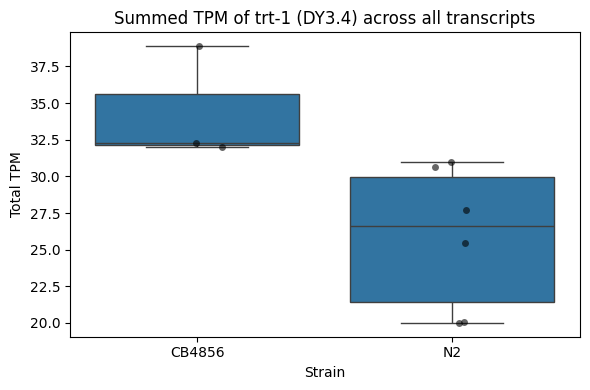

                              strain   avg_TPM
13    CB4856_GZ_B5_I9_GZpool_04_2019  9.720476
15    CB4856_GZ_B1_H3_GZpool_07_2020  8.074484
14    CB4856_GZ_B6_C6_GZpool_06_2019  8.000284
422     MY16_GZ_B6_G5_GZpool_06_2019  7.912205
42   CX11314_GZ_B6_F4_GZpool_06_2019  7.806040
52     DL238_GZ_B1_H5_GZpool_01_2019  7.206529
122   ED3017_GZ_B6_D2_GZpool_06_2019  7.174600
420     MY16_GZ_B1_F7_GZpool_01_2019  7.011751
416      MY1_GZ_B4_D6_GZpool_04_2019  6.914711
54     DL238_GZ_B6_C8_GZpool_06_2019  6.623213
1        AB1_GZ_B5_D6_GZpool_02_2019  6.395157
415      MY1_GZ_B1_C2_GZpool_01_2019  6.308233
41   CX11314_GZ_B6_A1_GZpool_04_2019  6.239015
3       AB1_GZr_B3_C9_GZpool_07_2020  5.931752
120   ED3017_GZ_B1_H8_GZpool_01_2019  5.917980
425    MY18_GZr_B3_C2_GZpool_07_2020  5.909364
412    LKC34_GZ_B1_I7_GZpool_01_2019  5.866110
414    LKC34_GZ_B6_E1_GZpool_06_2019  5.770815
53     DL238_GZ_B6_A2_GZpool_04_2019  5.584908
413    LKC34_GZ_B6_B2_GZpool_04_2019  5.275386
121   ED3017_

/tmp/ipython-input-52-3960350228.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_avg_expr['group'] = filtered_avg_expr['strain'].apply(


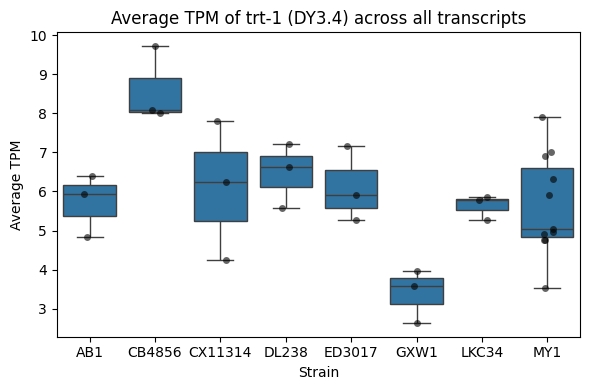

In [ ]:
# # This plot compares the expression of "Y48E1C.2.2" between 'GXW1' and 'N2'
# # High TPM values mean?


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# target = "DY3.4b.2"

# expr = tpm[tpm['transcript'].str.contains("DY3.4b.2")].drop(['transcript', 'gene_name'], axis=1).T
# expr.columns = ['expression']
# expr.index.name = 'sample'
# expr = expr.reset_index()

# expr['group'] = expr['sample'].apply(lambda x: 'MY1' if 'MY1' in x else ('N2' if 'N2' in x else None))
# expr = expr[expr['group'].isin(['MY1', 'N2'])]

# plt.figure(figsize=(6, 4))
# sns.boxplot(x='group', y='expression', data=expr)
# sns.stripplot(x='group', y='expression', data=expr, color='black', jitter=True, alpha=0.6)
# plt.title(f'Expression of {target}')
# plt.ylabel('TPM')
# plt.xlabel('Sample group')
# plt.tight_layout()
# plt.show()

# #interested_samples = df[['transcript', 'CX11314', 'CB4856', 'ED3017', 'AB1','GXW1', 'MY1', 'MY16', 'LKC34', 'DL238']]

# ## It is up to you to make the plot fancier!

#-----------------------------------------------------------------------------------------------------------------------------

# # Step 1: Pull all trt-1 transcripts
# trt1_df = tpm[tpm['gene_name'] == 'DY3.4a.1']
# print("Number of trt-1 transcripts found:", trt1_df.shape[0])

# # Step 2: Melt the dataframe to long format
# melted = trt1_df.melt(id_vars=['transcript', 'gene_name'], var_name='sample', value_name='tpm')

# # Step 3: Assign group using .str.contains() safely
# def get_group(s):
#     if 'GXW1' in s:
#         return 'GXW1'
#     elif 'N2' in s:
#         return 'N2'
#     else:
#         return None

# melted['group'] = melted['sample'].apply(get_group)
# melted = melted[melted['group'].notnull()]

# # Step 4: Group by sample and sum across transcripts
# grouped = melted.groupby(['sample', 'group'])['tpm'].sum().reset_index()

# # Step 5: Plot
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(6, 4))
# sns.boxplot(data=grouped, x='group', y='tpm')
# sns.stripplot(data=grouped, x='group', y='tpm', color='black', jitter=True, alpha=0.6)
# plt.title('Combined trt-1 Expression: GXW1 vs N2')
# plt.ylabel('TPM')
# plt.xlabel('Strain')
# plt.tight_layout()
# plt.show()

#--------------------------------------------------------------------------------------------------------

# 1. Filter the transcripts for trt-1 (use .str.contains() to match them robustly)
trt1_transcripts = tpm[tpm['transcript'].str.contains("DY3.4")]

# 2. Drop unnecessary columns like 'gene_name' if it exists
trt1_transcripts = trt1_transcripts.drop(columns=['gene_name'], errors='ignore')

# 3. Set transcript column as index (so we can sum across it)
trt1_transcripts = trt1_transcripts.set_index('transcript')

# 4. Sum across all 4 transcripts for each sample
trt1_summed = trt1_transcripts.sum(axis=0)  # result: one value per sample

# Calculate average TPM per sample for trt-1
trt1_avg = trt1_transcripts.mean(axis=0)  # one value per sample

# Reset to a DataFrame
trt1_avg_expr_df = trt1_avg.reset_index()
trt1_avg_expr_df.columns = ['strain', 'avg_TPM']

# 5. Reset the index so it's a DataFrame
trt1_summed = trt1_summed.reset_index()
trt1_summed.columns = ['sample', 'total_trt1_TPM']

# 6. Assign strain/group based on sample name (like before)
trt1_summed['group'] = trt1_summed['sample'].apply(
    lambda x: 'CB4856' if 'CB4856' in x else ('N2' if 'N2' in x else None)
)

# 7. Filter to just CB4856 and N2 samples
trt1_summed = trt1_summed[trt1_summed['group'].isin(['CB4856', 'N2'])]

plt.figure(figsize=(6,4))
sns.boxplot(data=trt1_summed, x='group', y='total_trt1_TPM')
sns.stripplot(data=trt1_summed, x='group', y='total_trt1_TPM', color='black', alpha=0.6, jitter=True)
plt.title("Summed TPM of trt-1 (DY3.4) across all transcripts")
plt.ylabel("Total TPM")
plt.xlabel("Strain")
plt.tight_layout()
plt.show()

# Step 1: Define strains you care about
desired_strains = [
    'CX11314', 'EG4725', 'CB4856', 'ED3017', 'JU393', 'AB1',
    'GXW1', 'MY1', 'MY16', 'LKC34', 'DL238', 'ED3072'
]

# Step 2: Use .str.contains() to find matching sample names in avg_TPM dataframe
# This handles long replicate names like 'CB4856_GZ_B5_I9_GZpool_04_2019'

filtered_avg_expr = trt1_avg_expr_df[
    trt1_avg_expr_df['strain'].apply(lambda x: any(d in x for d in desired_strains))
]

# Step 3: View the result
print(filtered_avg_expr.sort_values('avg_TPM', ascending=False))

# Optional: Add a plot for average TPMs too
filtered_avg_expr['group'] = filtered_avg_expr['strain'].apply(
    lambda x: next((d for d in desired_strains if d in x), None)
)

plt.figure(figsize=(6,4))
sns.boxplot(data=filtered_avg_expr, x='group', y='avg_TPM')
sns.stripplot(data=filtered_avg_expr, x='group', y='avg_TPM', color='black', alpha=0.6, jitter=True)
plt.title("Average TPM of trt-1 (DY3.4) across all transcripts")
plt.ylabel("Average TPM")
plt.xlabel("Strain")
plt.tight_layout()

# Step 2: Filter the summed TPM DataFrame (trt1_summed) by checking if strain name is in sample name
filtered_summed_expr = trt1_summed[
    trt1_summed['sample'].apply(lambda x: any(d in x for d in desired_strains))
].copy()

# Step 3: Extract clean strain names for display (optional)
filtered_summed_expr['strain'] = filtered_summed_expr['sample'].apply(
    lambda x: next((d for d in desired_strains if d in x), None)
)

# Step 4: View or print the table
print(filtered_summed_expr[['strain', 'sample', 'total_trt1_TPM']].sort_values(by='total_trt1_TPM', ascending=False))

#---------------------------------------------------------------------------------------------------------------------------


In [ ]:
print(metadata_subset['condition'].unique())

['GXW1' 'N2']


Summary TPM per strain:
    strain  mean_total_TPM  mean_avg_TPM  sample_count
1   CB4856       34.393659      8.598415             3
3    DL238       25.886200      6.471550             3
8       N2       25.823145      6.455786             6
4   ED3017       24.471560      6.117890             3
2  CX11314       24.400960      6.100240             3
0      AB1       22.877679      5.719420             3
7      MY1       22.557324      5.639331            11
6    LKC34       22.549748      5.637437             3
5     GXW1       13.575567      3.393892             3
Detailed TPM per sample:
      strain                           sample  total_trt1_TPM  avg_trt1_TPM
13    CB4856   CB4856_GZ_B5_I9_GZpool_04_2019       38.881905      9.720476
15    CB4856   CB4856_GZ_B1_H3_GZpool_07_2020       32.297936      8.074484
14    CB4856   CB4856_GZ_B6_C6_GZpool_06_2019       32.001135      8.000284
422      MY1     MY16_GZ_B6_G5_GZpool_06_2019       31.648821      7.912205
42   CX11314  CX11314

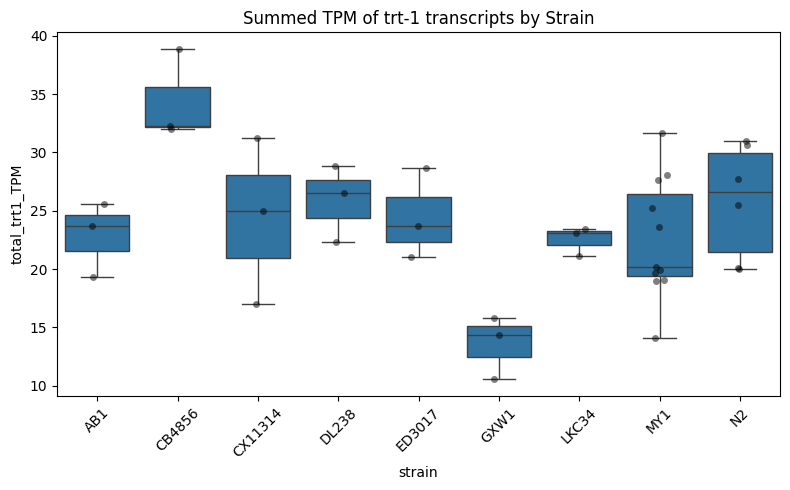

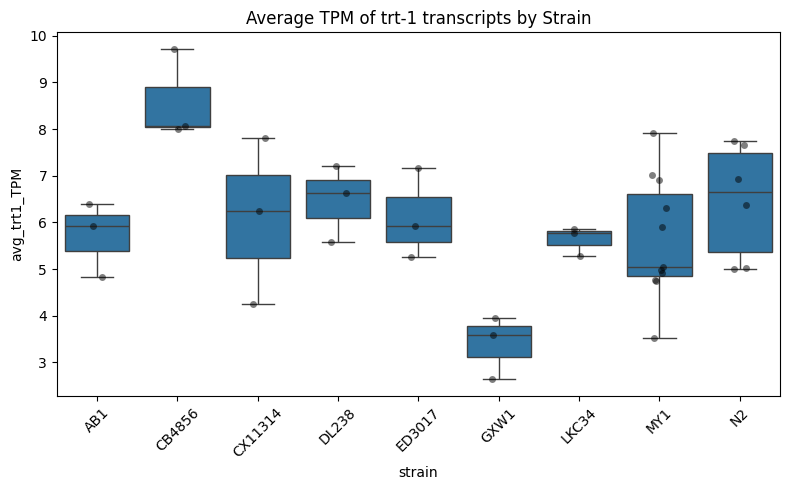

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter transcripts for trt-1 (DY3.4)
trt1_transcripts = tpm[tpm['transcript'].str.contains("DY3.4")]

# 2. Drop unnecessary columns
trt1_transcripts = trt1_transcripts.drop(columns=['gene_name'], errors='ignore')

# 3. Set 'transcript' as index so we can sum across transcripts for each sample
trt1_transcripts = trt1_transcripts.set_index('transcript')

# 4. Calculate summed TPM per sample (sum across transcripts)
trt1_summed = trt1_transcripts.sum(axis=0).reset_index()
trt1_summed.columns = ['sample', 'total_trt1_TPM']

# 5. Calculate average TPM per sample (mean across transcripts)
trt1_avg = trt1_transcripts.mean(axis=0).reset_index()
trt1_avg.columns = ['sample', 'avg_trt1_TPM']

# 6. Merge summed and average TPM data on sample
trt1_combined = pd.merge(trt1_summed, trt1_avg, on='sample')

# 7. Define your desired strains list
desired_strains = [
    'CX11314', 'EG4725', 'CB4856', 'ED3017', 'JU393', 'AB1',
    'GXW1', 'MY1', 'MY16', 'LKC34', 'DL238', 'ED3072', 'N2'
]

# 8. Filter to only samples matching desired strains
trt1_filtered = trt1_combined[
    trt1_combined['sample'].apply(lambda x: any(ds in x for ds in desired_strains))
].copy()

# 9. Extract clean strain names from sample for easier grouping
trt1_filtered['strain'] = trt1_filtered['sample'].apply(
    lambda x: next((ds for ds in desired_strains if ds in x), None)
)

# 10. Now, aggregate or summarize by strain if you want:
# For example, mean of summed TPM and average TPM per strain:
strain_summary = trt1_filtered.groupby('strain').agg(
    mean_total_TPM=('total_trt1_TPM', 'mean'),
    mean_avg_TPM=('avg_trt1_TPM', 'mean'),
    sample_count=('sample', 'count')
).reset_index()

print("Summary TPM per strain:")
print(strain_summary.sort_values('mean_total_TPM', ascending=False))

# 11. You can also output the detailed table with each sample info:
print("Detailed TPM per sample:")
print(trt1_filtered[['strain', 'sample', 'total_trt1_TPM', 'avg_trt1_TPM']].sort_values('total_trt1_TPM', ascending=False))

# 12. Optional plots:

plt.figure(figsize=(8,5))
sns.boxplot(data=trt1_filtered, x='strain', y='total_trt1_TPM')
sns.stripplot(data=trt1_filtered, x='strain', y='total_trt1_TPM', color='black', alpha=0.5, jitter=True)
plt.title('Summed TPM of trt-1 transcripts by Strain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=trt1_filtered, x='strain', y='avg_trt1_TPM')
sns.stripplot(data=trt1_filtered, x='strain', y='avg_trt1_TPM', color='black', alpha=0.5, jitter=True)
plt.title('Average TPM of trt-1 transcripts by Strain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Summary TPM per strain:
   strain  mean_total_TPM  mean_avg_TPM  sample_count
0  CB4856       34.393659      8.598415             3
2      N2       25.823145      6.455786             6
1    GXW1       13.575567      3.393892             3
Detailed TPM per sample:
     strain                           sample  total_trt1_TPM  avg_trt1_TPM
13   CB4856   CB4856_GZ_B5_I9_GZpool_04_2019       38.881905      9.720476
15   CB4856   CB4856_GZ_B1_H3_GZpool_07_2020       32.297936      8.074484
14   CB4856   CB4856_GZ_B6_C6_GZpool_06_2019       32.001135      8.000284
599      N2   WN2050_GZ_B8_A5_GZpool_06_2019       30.993346      7.748336
598      N2   WN2050_GZ_B6_H8_GZpool_04_2019       30.671934      7.667983
457      N2      N2_GZr_B6_E4_GZpool_08_2020       27.699741      6.924935
458      N2    N2_GZm_B6_H3_GZpool_0408_2020       25.480118      6.370029
600      N2  WN2050_GZr_B6_F2_GZpool_08_2020       20.087728      5.021932
456      N2       N2_GZ_B7_A7_GZpool_06_2019       20.006005

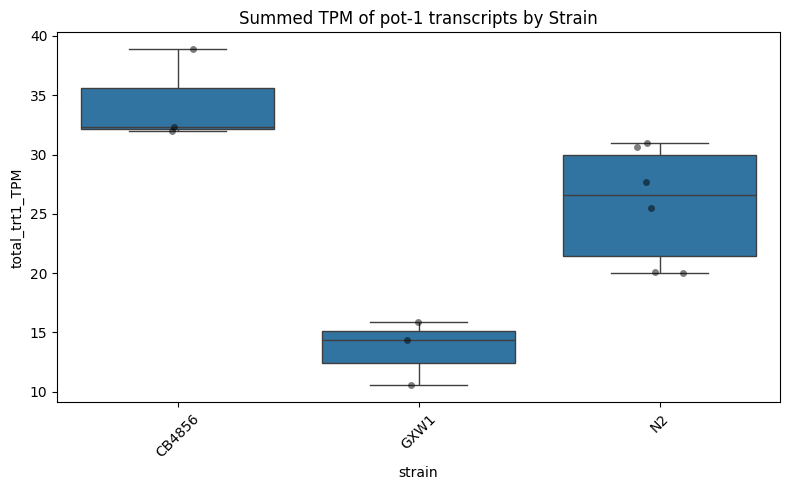

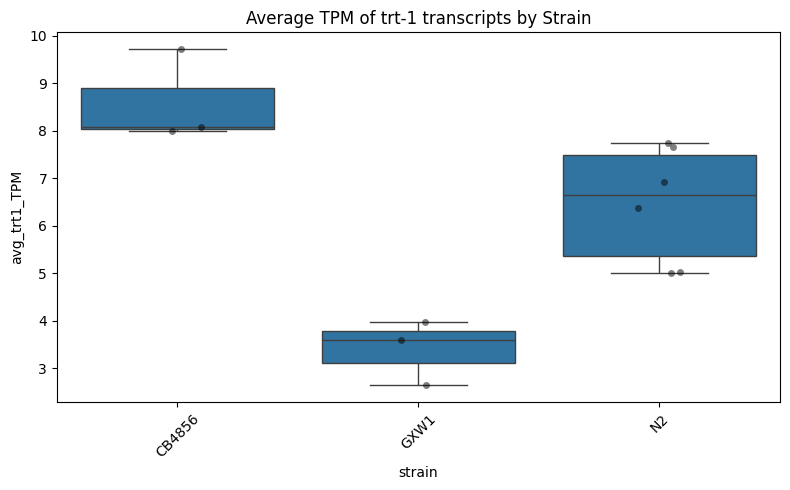

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter transcripts for pot-1 (B0280.10)
trt1_transcripts = tpm[tpm['transcript'].str.contains("DY3.4")]

# 2. Drop unnecessary columns
trt1_transcripts = trt1_transcripts.drop(columns=['gene_name'], errors='ignore')

# 3. Set 'transcript' as index so we can sum across transcripts for each sample
trt1_transcripts = trt1_transcripts.set_index('transcript')

# 4. Calculate summed TPM per sample (sum across transcripts)
trt1_summed = trt1_transcripts.sum(axis=0).reset_index()
trt1_summed.columns = ['sample', 'total_trt1_TPM']

# 5. Calculate average TPM per sample (mean across transcripts)
trt1_avg = trt1_transcripts.mean(axis=0).reset_index()
trt1_avg.columns = ['sample', 'avg_trt1_TPM']

# 6. Merge summed and average TPM data on sample
trt1_combined = pd.merge(trt1_summed, trt1_avg, on='sample')

# 7. Define your desired strains list
desired_strains = [
    'CB4856','GXW1', 'N2'
]

# 8. Filter to only samples matching desired strains
trt1_filtered = trt1_combined[
    trt1_combined['sample'].apply(lambda x: any(ds in x for ds in desired_strains))
].copy()

# 9. Extract clean strain names from sample for easier grouping
trt1_filtered['strain'] = trt1_filtered['sample'].apply(
    lambda x: next((ds for ds in desired_strains if ds in x), None)
)

# 10. Now, aggregate or summarize by strain if you want:
# For example, mean of summed TPM and average TPM per strain:
strain_summary = trt1_filtered.groupby('strain').agg(
    mean_total_TPM=('total_trt1_TPM', 'mean'),
    mean_avg_TPM=('avg_trt1_TPM', 'mean'),
    sample_count=('sample', 'count')
).reset_index()

print("Summary TPM per strain:")
print(strain_summary.sort_values('mean_total_TPM', ascending=False))

# 11. You can also output the detailed table with each sample info:
print("Detailed TPM per sample:")
print(trt1_filtered[['strain', 'sample', 'total_trt1_TPM', 'avg_trt1_TPM']].sort_values('total_trt1_TPM', ascending=False))

# 12. Optional plots:

plt.figure(figsize=(8,5))
sns.boxplot(data=trt1_filtered, x='strain', y='total_trt1_TPM')
sns.stripplot(data=trt1_filtered, x='strain', y='total_trt1_TPM', color='black', alpha=0.5, jitter=True)
plt.title('Summed TPM of pot-1 transcripts by Strain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=trt1_filtered, x='strain', y='avg_trt1_TPM')
sns.stripplot(data=trt1_filtered, x='strain', y='avg_trt1_TPM', color='black', alpha=0.5, jitter=True)
plt.title('Average TPM of trt-1 transcripts by Strain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Summary TPM per strain:
   strain  mean_total_TPM  mean_avg_TPM  sample_count
0  CB4856       83.115635     27.705212             3
2      N2       77.630824     25.876941             6
1    GXW1       52.888751     17.629584             3
Detailed TPM per sample:
     strain                           sample  total_trt1_TPM  avg_trt1_TPM
457      N2      N2_GZr_B6_E4_GZpool_08_2020       86.908914     28.969638
14   CB4856   CB4856_GZ_B6_C6_GZpool_06_2019       85.308120     28.436040
598      N2   WN2050_GZ_B6_H8_GZpool_04_2019       85.236089     28.412030
15   CB4856   CB4856_GZ_B1_H3_GZpool_07_2020       82.102801     27.367600
13   CB4856   CB4856_GZ_B5_I9_GZpool_04_2019       81.935985     27.311995
599      N2   WN2050_GZ_B8_A5_GZpool_06_2019       81.259652     27.086551
458      N2    N2_GZm_B6_H3_GZpool_0408_2020       72.024452     24.008151
456      N2       N2_GZ_B7_A7_GZpool_06_2019       70.930101     23.643367
600      N2  WN2050_GZr_B6_F2_GZpool_08_2020       69.425737

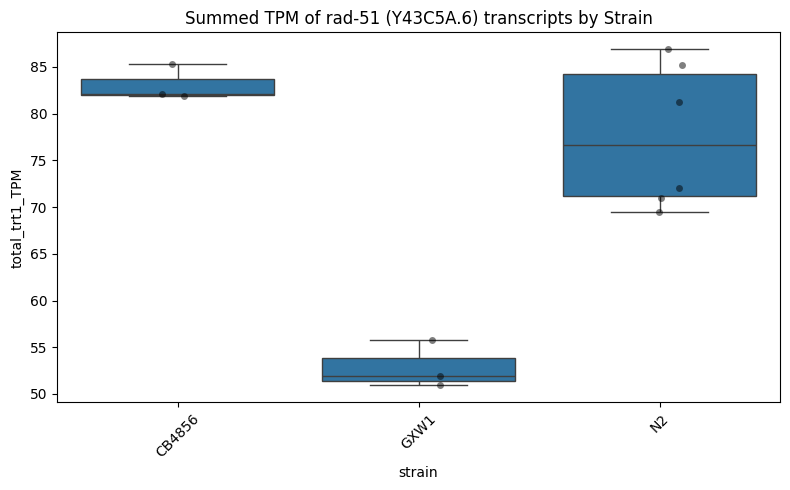

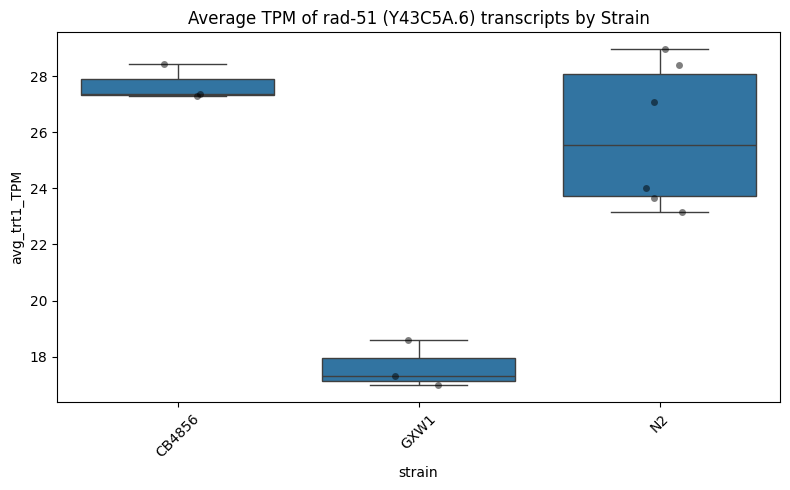

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter transcripts for pot-2 (F57C2.3)
trt1_transcripts = tpm[tpm['transcript'].str.contains("Y43C5A.6")]

# 2. Drop unnecessary columns
trt1_transcripts = trt1_transcripts.drop(columns=['gene_name'], errors='ignore')

# 3. Set 'transcript' as index so we can sum across transcripts for each sample
trt1_transcripts = trt1_transcripts.set_index('transcript')

# 4. Calculate summed TPM per sample (sum across transcripts)
trt1_summed = trt1_transcripts.sum(axis=0).reset_index()
trt1_summed.columns = ['sample', 'total_trt1_TPM']

# 5. Calculate average TPM per sample (mean across transcripts)
trt1_avg = trt1_transcripts.mean(axis=0).reset_index()
trt1_avg.columns = ['sample', 'avg_trt1_TPM']

# 6. Merge summed and average TPM data on sample
trt1_combined = pd.merge(trt1_summed, trt1_avg, on='sample')

# 7. Define your desired strains list
desired_strains = [
    'CB4856','GXW1', 'N2'
]

# 8. Filter to only samples matching desired strains
trt1_filtered = trt1_combined[
    trt1_combined['sample'].apply(lambda x: any(ds in x for ds in desired_strains))
].copy()

# 9. Extract clean strain names from sample for easier grouping
trt1_filtered['strain'] = trt1_filtered['sample'].apply(
    lambda x: next((ds for ds in desired_strains if ds in x), None)
)

# 10. Now, aggregate or summarize by strain if you want:
# For example, mean of summed TPM and average TPM per strain:
strain_summary = trt1_filtered.groupby('strain').agg(
    mean_total_TPM=('total_trt1_TPM', 'mean'),
    mean_avg_TPM=('avg_trt1_TPM', 'mean'),
    sample_count=('sample', 'count')
).reset_index()

print("Summary TPM per strain:")
print(strain_summary.sort_values('mean_total_TPM', ascending=False))

# 11. You can also output the detailed table with each sample info:
print("Detailed TPM per sample:")
print(trt1_filtered[['strain', 'sample', 'total_trt1_TPM', 'avg_trt1_TPM']].sort_values('total_trt1_TPM', ascending=False))

# 12. Optional plots:

plt.figure(figsize=(8,5))
sns.boxplot(data=trt1_filtered, x='strain', y='total_trt1_TPM')
sns.stripplot(data=trt1_filtered, x='strain', y='total_trt1_TPM', color='black', alpha=0.5, jitter=True)
plt.title('Summed TPM of rad-51 (Y43C5A.6) transcripts by Strain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=trt1_filtered, x='strain', y='avg_trt1_TPM')
sns.stripplot(data=trt1_filtered, x='strain', y='avg_trt1_TPM', color='black', alpha=0.5, jitter=True)
plt.title('Average TPM of rad-51 (Y43C5A.6) transcripts by Strain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Summary TPM per strain:
   strain  mean_total_TPM  mean_avg_TPM  sample_count
2      N2       37.185721      9.296430             6
0  CB4856       35.397641      8.849410             3
1    GXW1       28.926595      7.231649             3
Detailed TPM per sample:
     strain                           sample  total_trt1_TPM  avg_trt1_TPM
457      N2      N2_GZr_B6_E4_GZpool_08_2020       41.224020     10.306005
599      N2   WN2050_GZ_B8_A5_GZpool_06_2019       40.688866     10.172217
598      N2   WN2050_GZ_B6_H8_GZpool_04_2019       38.103249      9.525812
14   CB4856   CB4856_GZ_B6_C6_GZpool_06_2019       37.466174      9.366544
15   CB4856   CB4856_GZ_B1_H3_GZpool_07_2020       37.378126      9.344532
456      N2       N2_GZ_B7_A7_GZpool_06_2019       36.304466      9.076116
458      N2    N2_GZm_B6_H3_GZpool_0408_2020       33.925199      8.481300
600      N2  WN2050_GZr_B6_F2_GZpool_08_2020       32.868528      8.217132
13   CB4856   CB4856_GZ_B5_I9_GZpool_04_2019       31.348623

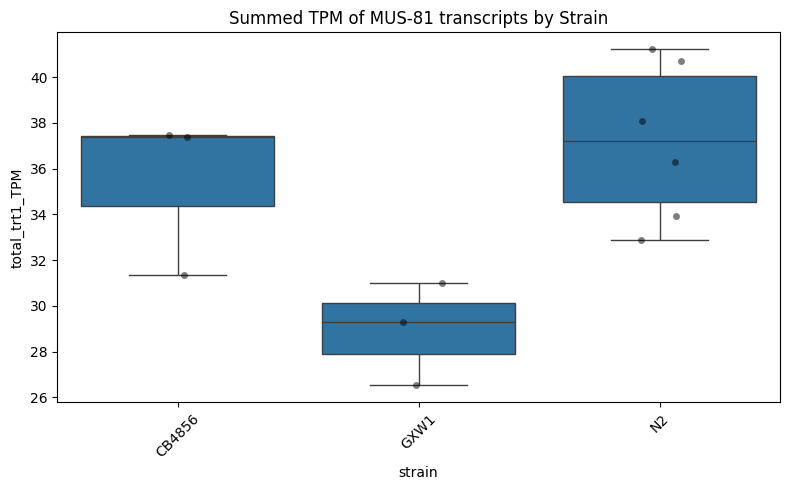

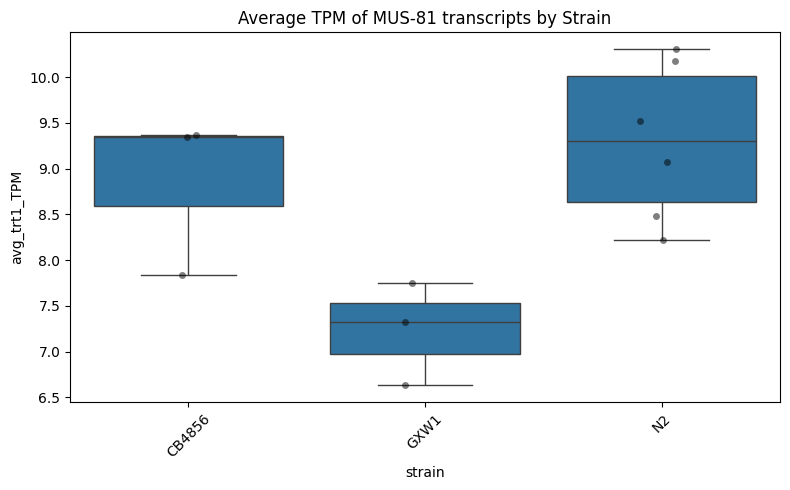

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter transcripts for MUS-81 (C43E11.2)
trt1_transcripts = tpm[tpm['transcript'].str.contains("C43E11.2")]

# 2. Drop unnecessary columns
trt1_transcripts = trt1_transcripts.drop(columns=['gene_name'], errors='ignore')

# 3. Set 'transcript' as index so we can sum across transcripts for each sample
trt1_transcripts = trt1_transcripts.set_index('transcript')

# 4. Calculate summed TPM per sample (sum across transcripts)
trt1_summed = trt1_transcripts.sum(axis=0).reset_index()
trt1_summed.columns = ['sample', 'total_trt1_TPM']

# 5. Calculate average TPM per sample (mean across transcripts)
trt1_avg = trt1_transcripts.mean(axis=0).reset_index()
trt1_avg.columns = ['sample', 'avg_trt1_TPM']

# 6. Merge summed and average TPM data on sample
trt1_combined = pd.merge(trt1_summed, trt1_avg, on='sample')

# 7. Define your desired strains list
desired_strains = [
    'CB4856','GXW1', 'N2'
]

# 8. Filter to only samples matching desired strains
trt1_filtered = trt1_combined[
    trt1_combined['sample'].apply(lambda x: any(ds in x for ds in desired_strains))
].copy()

# 9. Extract clean strain names from sample for easier grouping
trt1_filtered['strain'] = trt1_filtered['sample'].apply(
    lambda x: next((ds for ds in desired_strains if ds in x), None)
)

# 10. Now, aggregate or summarize by strain if you want:
# For example, mean of summed TPM and average TPM per strain:
strain_summary = trt1_filtered.groupby('strain').agg(
    mean_total_TPM=('total_trt1_TPM', 'mean'),
    mean_avg_TPM=('avg_trt1_TPM', 'mean'),
    sample_count=('sample', 'count')
).reset_index()

print("Summary TPM per strain:")
print(strain_summary.sort_values('mean_total_TPM', ascending=False))

# 11. You can also output the detailed table with each sample info:
print("Detailed TPM per sample:")
print(trt1_filtered[['strain', 'sample', 'total_trt1_TPM', 'avg_trt1_TPM']].sort_values('total_trt1_TPM', ascending=False))

# 12. Optional plots:

plt.figure(figsize=(8,5))
sns.boxplot(data=trt1_filtered, x='strain', y='total_trt1_TPM')
sns.stripplot(data=trt1_filtered, x='strain', y='total_trt1_TPM', color='black', alpha=0.5, jitter=True)
plt.title('Summed TPM of MUS-81 transcripts by Strain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=trt1_filtered, x='strain', y='avg_trt1_TPM')
sns.stripplot(data=trt1_filtered, x='strain', y='avg_trt1_TPM', color='black', alpha=0.5, jitter=True)
plt.title('Average TPM of MUS-81 transcripts by Strain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Processing: POT-1 (B0280.10)
Summary TPM per strain:
    strain  mean_total_TPM  mean_avg_TPM  sample_count
1   CB4856       20.851228      6.950409             3
0      AB1       19.746082      6.582027             3
8       N2       19.001315      6.333772             6
2  CX11314       18.515663      6.171888             3
3    DL238       17.821790      5.940597             3
4   ED3017       17.759750      5.919917             3
6    LKC34       17.646875      5.882292             3
7      MY1       16.321763      5.440588            11
5     GXW1       11.285025      3.761675             3

Detailed TPM per sample:
      strain                           sample  total_pot-1_TPM  avg_pot-1_TPM
42   CX11314  CX11314_GZ_B6_F4_GZpool_06_2019        25.768892       8.589631
1        AB1      AB1_GZ_B5_D6_GZpool_02_2019        25.670204       8.556735
598       N2   WN2050_GZ_B6_H8_GZpool_04_2019        23.589035       7.863012
416      MY1      MY1_GZ_B4_D6_GZpool_04_2019        23.54

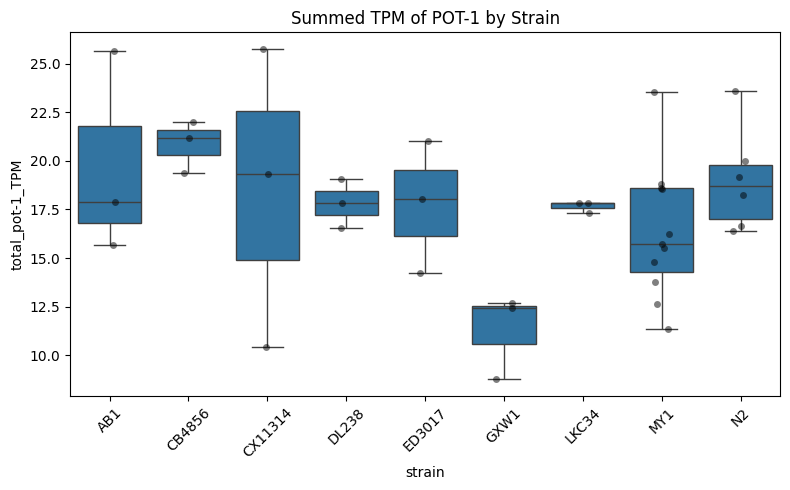

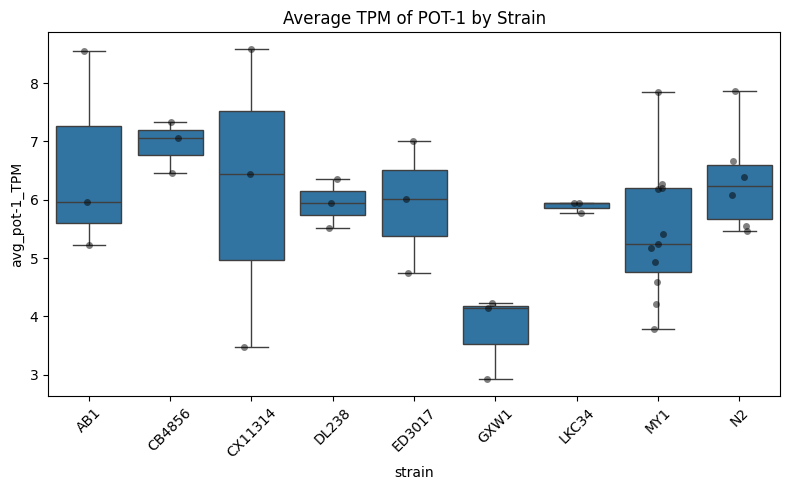


Processing: POT-2 (F57C2.3)
Summary TPM per strain:
    strain  mean_total_TPM  mean_avg_TPM  sample_count
3    DL238       54.950566     54.950566             3
4   ED3017       54.583845     54.583845             3
2  CX11314       51.257620     51.257620             3
6    LKC34       49.563884     49.563884             3
1   CB4856       48.803775     48.803775             3
8       N2       48.548622     48.548622             6
0      AB1       46.650022     46.650022             3
7      MY1       42.605518     42.605518            11
5     GXW1       26.277355     26.277355             3

Detailed TPM per sample:
      strain                           sample  total_pot-2_TPM  avg_pot-2_TPM
122   ED3017   ED3017_GZ_B6_D2_GZpool_06_2019        66.354583      66.354583
416      MY1      MY1_GZ_B4_D6_GZpool_04_2019        63.677812      63.677812
457       N2      N2_GZr_B6_E4_GZpool_08_2020        60.571813      60.571813
41   CX11314  CX11314_GZ_B6_A1_GZpool_04_2019        60.031

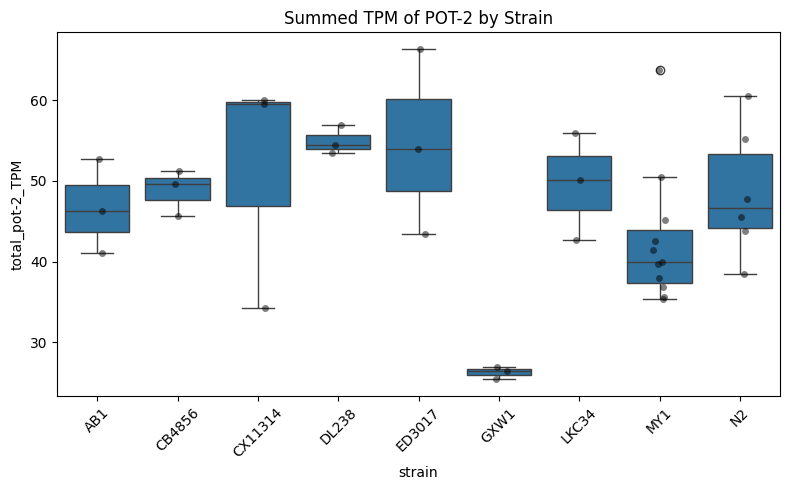

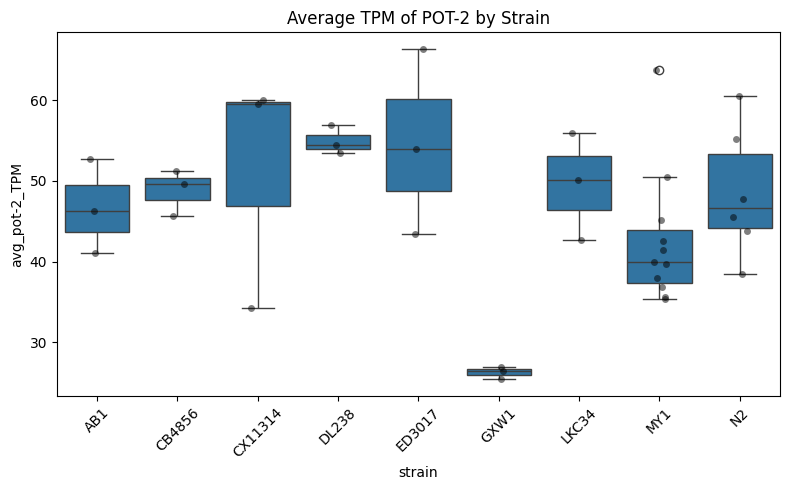


Processing: MUS-81 (C43E11.2)
Summary TPM per strain:
    strain  mean_total_TPM  mean_avg_TPM  sample_count
4   ED3017       38.476912      9.619228             3
8       N2       37.185721      9.296430             6
6    LKC34       36.508095      9.127024             3
1   CB4856       35.397641      8.849410             3
3    DL238       35.238550      8.809637             3
0      AB1       34.515030      8.628757             3
2  CX11314       33.572321      8.393080             3
7      MY1       33.187110      8.296778            11
5     GXW1       28.926595      7.231649             3

Detailed TPM per sample:
      strain                           sample  total_mus-81_TPM  \
416      MY1      MY1_GZ_B4_D6_GZpool_04_2019         44.826539   
2        AB1     AB1_GZr_B3_A3_GZpool_07_2020         42.258851   
457       N2      N2_GZr_B6_E4_GZpool_08_2020         41.224020   
599       N2   WN2050_GZ_B8_A5_GZpool_06_2019         40.688866   
42   CX11314  CX11314_GZ_B6_F4_GZp

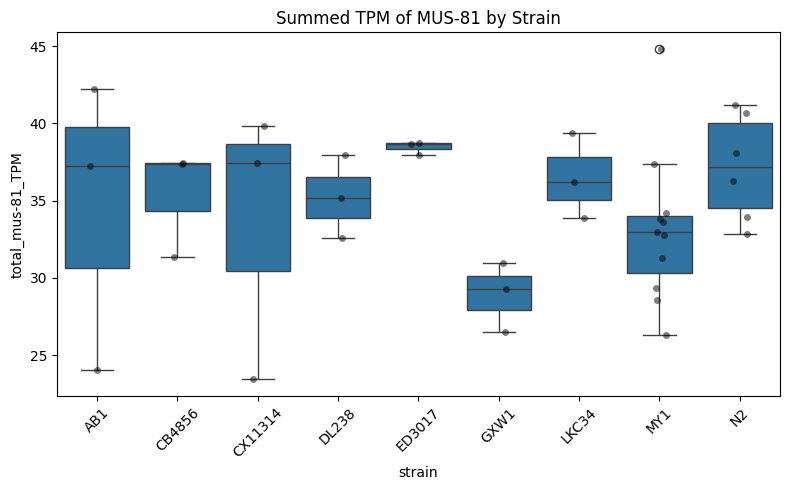

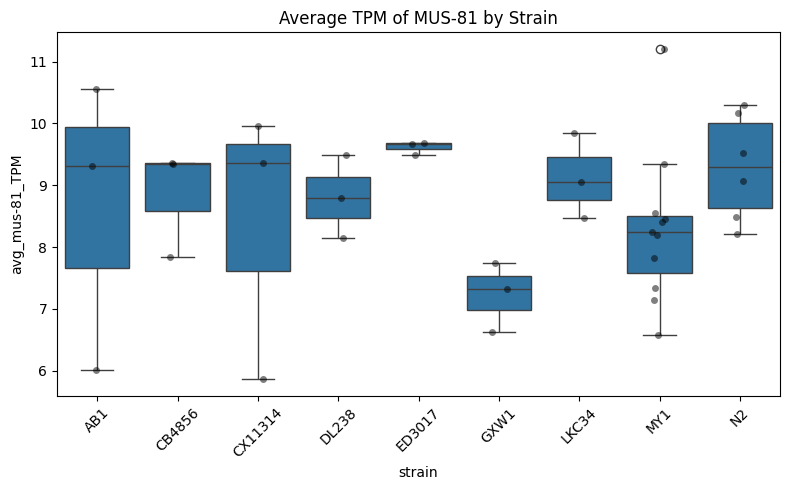


Processing: HPR-17 (F32A11.2)
Summary TPM per strain:
    strain  mean_total_TPM  mean_avg_TPM  sample_count
4   ED3017       39.885559     19.942779             3
2  CX11314       38.700297     19.350149             3
1   CB4856       37.951411     18.975706             3
7      MY1       37.468368     18.734184            11
6    LKC34       35.903648     17.951824             3
8       N2       35.260101     17.630051             6
3    DL238       31.080465     15.540233             3
0      AB1       29.402754     14.701377             3
5     GXW1       22.047301     11.023651             3

Detailed TPM per sample:
      strain                           sample  total_hpr-17_TPM  \
416      MY1      MY1_GZ_B4_D6_GZpool_04_2019         48.065904   
42   CX11314  CX11314_GZ_B6_F4_GZpool_06_2019         46.208373   
422      MY1     MY16_GZ_B6_G5_GZpool_06_2019         44.133597   
421      MY1     MY16_GZ_B6_B4_GZpool_04_2019         42.626054   
14    CB4856   CB4856_GZ_B6_C6_GZp

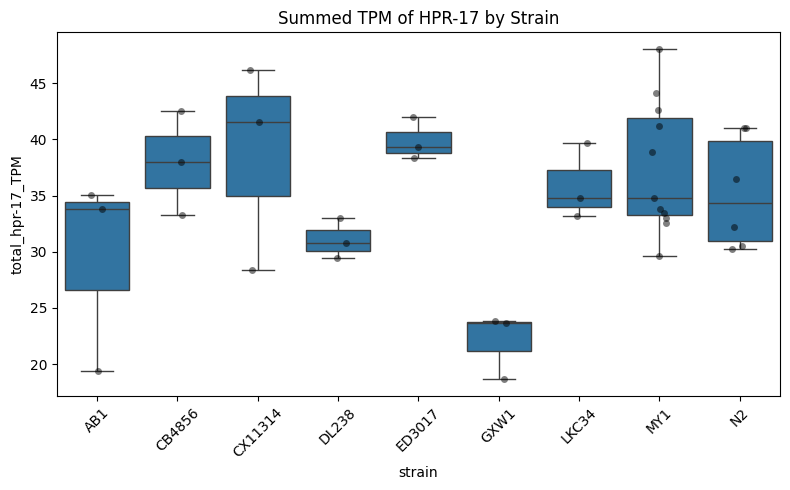

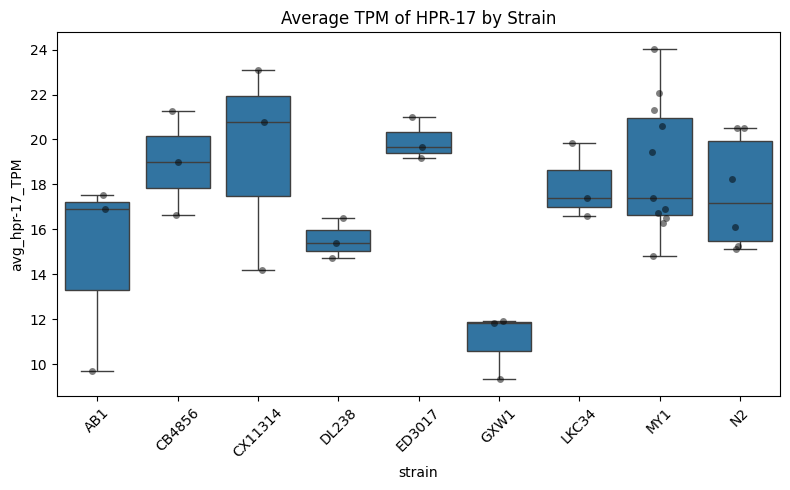

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gene-to-ID mapping
gene_ids = {
    'pot-1': 'B0280.10',
    'pot-2': 'F57C2.3',
    'mus-81': 'C43E11.2',
    'hpr-17': 'F32A11.2'
}

# Desired strains list
desired_strains = [
    'CX11314', 'EG4725', 'CB4856', 'ED3017', 'JU393', 'AB1',
    'GXW1', 'MY1', 'MY16', 'LKC34', 'DL238', 'ED3072', 'N2'
]

# Iterate through each gene
for gene_name, gene_id in gene_ids.items():
    print(f"\n==============================")
    print(f"Processing: {gene_name.upper()} ({gene_id})")

    # 1. Filter transcripts for this gene
    gene_transcripts = tpm[tpm['transcript'].str.contains(gene_id)]

    # 2. Drop 'gene_name' if present
    gene_transcripts = gene_transcripts.drop(columns=['gene_name'], errors='ignore')

    # 3. Set transcript as index
    gene_transcripts = gene_transcripts.set_index('transcript')

    # 4. Summed TPM
    gene_summed = gene_transcripts.sum(axis=0).reset_index()
    gene_summed.columns = ['sample', f'total_{gene_name}_TPM']

    # 5. Average TPM
    gene_avg = gene_transcripts.mean(axis=0).reset_index()
    gene_avg.columns = ['sample', f'avg_{gene_name}_TPM']

    # 6. Merge summed + avg
    gene_combined = pd.merge(gene_summed, gene_avg, on='sample')

    # 7. Filter for desired strains
    gene_filtered = gene_combined[
        gene_combined['sample'].apply(lambda x: any(ds in x for ds in desired_strains))
    ].copy()

    # 8. Extract strain name
    gene_filtered['strain'] = gene_filtered['sample'].apply(
        lambda x: next((ds for ds in desired_strains if ds in x), None)
    )

    # 9. Summarize per strain
    strain_summary = gene_filtered.groupby('strain').agg(
        mean_total_TPM=(f'total_{gene_name}_TPM', 'mean'),
        mean_avg_TPM=(f'avg_{gene_name}_TPM', 'mean'),
        sample_count=('sample', 'count')
    ).reset_index()

    # 10. Print output
    print("Summary TPM per strain:")
    print(strain_summary.sort_values('mean_total_TPM', ascending=False))

    print("\nDetailed TPM per sample:")
    print(gene_filtered[['strain', 'sample', f'total_{gene_name}_TPM', f'avg_{gene_name}_TPM']]
          .sort_values(f'total_{gene_name}_TPM', ascending=False))

    # 11. Plot total TPM
    plt.figure(figsize=(8,5))
    sns.boxplot(data=gene_filtered, x='strain', y=f'total_{gene_name}_TPM')
    sns.stripplot(data=gene_filtered, x='strain', y=f'total_{gene_name}_TPM', color='black', alpha=0.5, jitter=True)
    plt.title(f'Summed TPM of {gene_name.upper()} by Strain')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 12. Plot average TPM
    plt.figure(figsize=(8,5))
    sns.boxplot(data=gene_filtered, x='strain', y=f'avg_{gene_name}_TPM')
    sns.stripplot(data=gene_filtered, x='strain', y=f'avg_{gene_name}_TPM', color='black', alpha=0.5, jitter=True)
    plt.title(f'Average TPM of {gene_name.upper()} by Strain')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select your transcript of interest (just one isoform)
# Replace with the exact name from your data
target_transcript = "Y41C4A.14"

# 2. Extract the row for that one transcript
isoform_expr = tpm[tpm['transcript'] == target_transcript].copy()

# 3. Remove 'gene_name' column if present
isoform_expr = isoform_expr.drop(columns=['gene_name'], errors='ignore')

# 4. Melt to long format for easier plotting
isoform_expr_long = isoform_expr.melt(id_vars='transcript', var_name='sample', value_name='TPM')

# 5. Filter to desired strains
desired_strains = [
    'CX11314', 'EG4725', 'CB4856', 'ED3017', 'JU393', 'AB1',
    'GXW1', 'MY1', 'MY16', 'LKC34', 'DL238', 'ED3072', 'N2'
]

isoform_expr_long = isoform_expr_long[
    isoform_expr_long['sample'].apply(lambda x: any(ds in x for ds in desired_strains))
].copy()

# 6. Extract strain name from sample
isoform_expr_long['strain'] = isoform_expr_long['sample'].apply(
    lambda x: next((ds for ds in desired_strains if ds in x), None)
)

# 7. Output (optional)
print(f"TPM values for transcript {target_transcript}:")
print(isoform_expr_long.sort_values('TPM', ascending=False))

# 8. Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=isoform_expr_long, x='strain', y='TPM')
sns.stripplot(data=isoform_expr_long, x='strain', y='TPM', color='black', alpha=0.5, jitter=True)
plt.title(f'TPM of {target_transcript} across Strains')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'sample'

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# Filter TPM values for trt-1 transcript DY3.4
trt1_tpm = tpm[tpm['transcript'].isin(['DY3.4a.1'])]

# Extract TPM values for GXW1 and N2 samples (all columns containing strain names)
gxw1_samples = [col for col in tpm.columns if 'GXW1' in col]
n2_samples = [col for col in tpm.columns if 'N2' in col]

# Get expression values, flatten to 1D arrays
gxw1_values = trt1_tpm[gxw1_samples].values.flatten()
n2_values = trt1_tpm[n2_samples].values.flatten()

# Optional: Log-transform to stabilize variance (common with TPM)
gxw1_log = np.log2(gxw1_values + 1)
n2_log = np.log2(n2_values + 1)

# Run Welch’s t-test on log-transformed data
t_stat, p_val = ttest_ind(gxw1_log, n2_log, equal_var=False)

print(f"Welch’s t-test comparing trt-1 (DY3.4) expression:")
print(f"t-statistic = {t_stat:.3f}")
print(f"p-value = {p_val:.4e}")

gxw1_samples = [col for col in tpm.columns if 'GXW1' in col]
n2_samples = [col for col in tpm.columns if 'N2' in col]

print(f"Number of GXW1 samples: {len(gxw1_samples)}")
print(f"Number of N2 samples: {len(n2_samples)}")
print("GXW1 expression values for DY3.4:")
print(trt1_tpm[gxw1_samples].values)

print("N2 expression values for DY3.4:")
print(trt1_tpm[n2_samples].values)
dy3_4_transcripts = tpm[tpm['transcript'].str.contains("DY3.4")]
print(dy3_4_transcripts)

print([col for col in tpm.columns if 'GXW1' in col])
print([col for col in tpm.columns if 'N2' in col])